In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import math
import json
import seaborn as sns
from sklearn.feature_selection import f_classif
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
import collections
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier) 
import xgboost as xgb # XG Boost 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from time import time 
import lightgbm as lgb
import catboost as cb

In [2]:
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [3]:
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [5]:
portfolio= portfolio.rename(columns={'id': 'offer_id'})

In [6]:
portfolio.describe(include='all')

,reward,channels,difficulty,duration,offer_type,offer_id
count,10.000000,10,10.000000,10.000000,10,10
unique,NaN,4,NaN,NaN,3,10
top,NaN,"[web, email, mobile, social]",NaN,NaN,bogo,ae264e3637204a6fb9bb56bc8210ddfd
freq,NaN,4,NaN,NaN,4,1
mean,4.200000,NaN,7.700000,6.500000,NaN,NaN
std,3.583915,NaN,5.831905,2.321398,NaN,NaN
min,0.000000,NaN,0.000000,3.000000,NaN,NaN
25%,2.000000,NaN,5.000000,5.000000,NaN,NaN
50%,4.000000,NaN,8.500000,7.000000,NaN,NaN
75%,5.000000,NaN,10.000000,7.000000,NaN,NaN


In [7]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [8]:
# Turning off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.00
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.00
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [11]:
profile.duplicated().sum()

0

In [12]:
profile.describe(include='all')

,gender,age,id,became_member_on,income
count,14825,17000.00,17000,17000.00,14825.00
unique,3,NaN,17000,NaN,NaN
top,M,NaN,68be06ca386d4c31939f3a4f0e3dd783,NaN,NaN
freq,8484,NaN,1,NaN,NaN
mean,NaN,62.53,NaN,20167034.23,65404.99
std,NaN,26.74,NaN,11677.50,21598.30
min,NaN,18.00,NaN,20130729.00,30000.00
25%,NaN,45.00,NaN,20160526.00,49000.00
50%,NaN,58.00,NaN,20170802.00,64000.00
75%,NaN,73.00,NaN,20171230.00,80000.00


In [13]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [14]:
profile['age'].unique()

array([118,  55,  75,  68,  65,  58,  61,  26,  62,  49,  57,  40,  64,
        78,  42,  56,  33,  46,  59,  67,  53,  22,  96,  69,  20,  45,
        54,  39,  41,  79,  66,  29,  44,  63,  36,  76,  77,  30,  51,
        27,  73,  74,  70,  89,  50,  90,  60,  19,  72,  52,  18,  71,
        83,  43,  47,  32,  38,  34,  85,  48,  35,  82,  21,  24,  81,
        25,  37,  23, 100,  28,  84,  80,  87,  86,  94,  31,  88,  95,
        93,  91,  92,  98, 101,  97,  99], dtype=int64)

In [15]:
profile_wo_mv = profile.query('age != 118')

In [16]:
median_age = profile_wo_mv.age.median() # The median value of ages 
median_income = profile_wo_mv.income.median() # The median value of incomes

In [17]:
# Replace the missing values in gender column with U (Unknown), in income column with its median value. 
profile.fillna({'gender' : 'O', 'income':median_income }, inplace= True) 
# Replace the missing values (118) in age column with its median value. 
profile_cleaned = profile.replace({'age':118}, median_age)

Text(0.5, 0, 'Age')

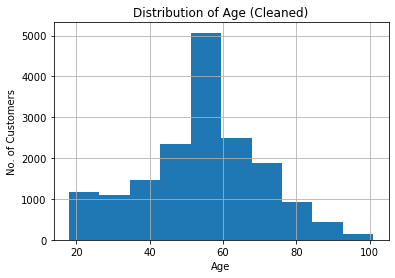

In [18]:
profile_cleaned.age.hist()
plt.title('Distribution of Age (Cleaned)')
plt.ylabel('No. of Customers')
plt.xlabel('Age')

Text(0.5, 0, 'Income')

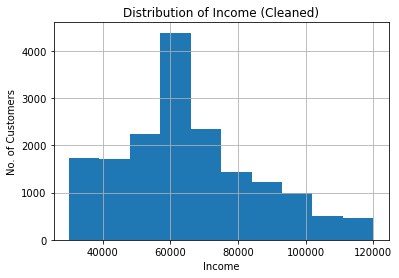

In [19]:
profile_cleaned.income.hist()
plt.title('Distribution of Income (Cleaned)')
plt.ylabel('No. of Customers')
plt.xlabel('Income')

Text(0.5, 0, 'Gender')

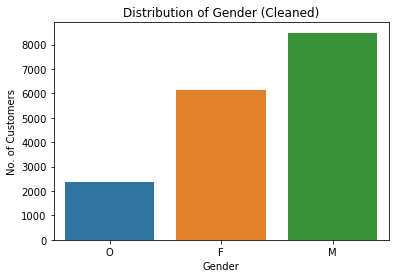

In [20]:
sns.countplot(data = profile_cleaned, x='gender')
plt.title('Distribution of Gender (Cleaned)')
plt.ylabel('No. of Customers')
plt.xlabel('Gender')

In [21]:
profile_cleaned['became_member_on'] = pd.to_datetime(profile_cleaned['became_member_on'], format = '%Y%m%d')

In [22]:
def calculate_days(dates):
    last_record = pd.Timestamp('2018-07-31')
    return last_record - dates

In [23]:
# Calculate the number of days as member for each customer. 
profile_cleaned['days_as_member'] =  profile_cleaned['became_member_on'].apply(calculate_days).dt.days

In [24]:
# To avoid confusion, I rename 'id' column with 'customer_id'. 
profile_cleaned= profile_cleaned.rename(columns={'id': 'customer_id'})

In [25]:
profile_cleaned.head()

,gender,age,customer_id,became_member_on,income,days_as_member
0,O,55,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,64000.00,534
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.00,381
2,O,55,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,64000.00,19
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.00,448
4,O,55,a03223e636434f42ac4c3df47e8bac43,2017-08-04,64000.00,361


In [26]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [27]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [28]:
transcript_normalized = pd.json_normalize(transcript.value)

In [29]:
transcript_normalized['offer_id'] = transcript_normalized['offer id'].fillna('') + transcript_normalized['offer_id'].fillna('')
transcript_mod = pd.concat([transcript, transcript_normalized], axis = 1)

In [30]:
# To drop unnecessary features 
transcript_mod.drop(['value', 'offer id'], axis =1, inplace = True) 

In [31]:
transcript_mod= transcript_mod.rename(columns={'person': 'customer_id'})

In [32]:
transcript['time'].unique()

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306,
       312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384,
       390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462,
       468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540,
       546, 552, 558, 564, 570, 576, 582, 588, 594, 600, 606, 612, 618,
       624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696,
       702, 708, 714], dtype=int64)

In [33]:
transcript['time'].value_counts()

408    17030
576    17015
504    16822
336    16302
168    16150
       ...  
318      940
330      938
156      914
162      910
150      894
Name: time, Length: 120, dtype: int64

In [34]:
# Calcuateing the number of days/ months after starting the test
## Nth day since testing
transcript_mod['days'] = transcript_mod['time']/6 +1 
transcript_mod['days'] = transcript_mod['days'].astype(int)
## Nth month since testing
transcript_mod['months'] = (transcript_mod['days']-1)//30 +1
transcript_mod['months'] = transcript_mod['months'].astype(int)

In [35]:
transcript_mod.head()

,customer_id,event,time,amount,offer_id,reward,days,months
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,1,1
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,1,1
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,1,1
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,1,1
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,1,1


In [36]:
transcript_offer_name = transcript_mod.merge(portfolio[['offer_type', 'offer_id']],left_on = 'offer_id', right_on = 'offer_id', how ='left' )

In [37]:
transcript_offer_name

,customer_id,event,time,amount,offer_id,reward,days,months,offer_type
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,1,1,bogo
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,1,1,discount
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,1,1,discount
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,1,1,discount
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,1,1,bogo
...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,,NaN,120,4,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,,NaN,120,4,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,,NaN,120,4,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,,NaN,120,4,NaN


In [38]:
#Dataset seperate into two datasets: offer_based, and sales_based 
# Offer_based_transaction: event != "transaction"
# From offer_based_transaction, we can figure out which offers are provided which customers. 
offer_based_transaction = transcript_offer_name.query('event != "transaction"')
offer_based_transaction.drop(['amount'], axis = 1, inplace=True)
# sales_based_transaction: event == "transaction"
# From sales_based_transaction, we can figure out how much customers spent at our stores. 
sales_based_transaction = transcript_offer_name.query('event == "transaction"')
sales_based_transaction.drop(['offer_id'], axis = 1, inplace=True)

C:\Users\hruth\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
#Checkpoints
offer_info_df = portfolio.copy()
customer_info_df = profile_cleaned.copy()
transactions_df = transcript_offer_name.copy()
sales_transaction_df = sales_based_transaction.copy()
offers_transaction_df = offer_based_transaction.copy()

In [40]:
#The Change of traffics during the test period

Text(0, 0.5, 'Daily Traffics')

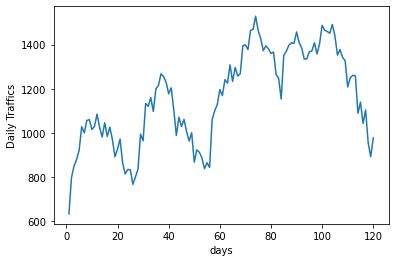

In [41]:
sales_transaction_df.groupby('days')['customer_id'].count().plot(kind ='line')
plt.ylabel('Daily Traffics')

Text(0, 0.5, 'Monthly Traffics')

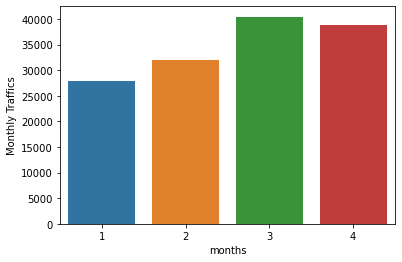

In [42]:
sns.countplot(data = sales_transaction_df, x = 'months')
plt.ylabel('Monthly Traffics')

In [43]:
#The Sales Trend Amount during the test period

Text(0, 0.5, 'Total Monthly Average Sales')

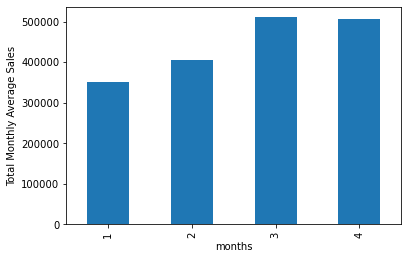

In [44]:
sales_transaction_df.groupby('months')['amount'].sum().plot(kind ='bar')
plt.ylabel('Total Monthly Average Sales')

Text(0, 0.5, 'sales_MA(6)')

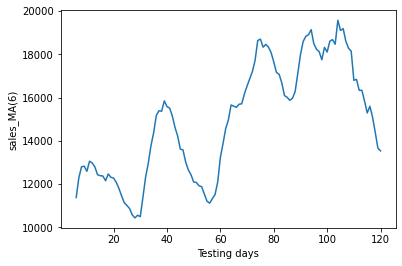

In [45]:
sales = sales_transaction_df.groupby('days',  as_index= False)['amount'].sum()
sales['sales_MA(6)'] = sales.iloc[:,1].rolling(window =6).mean()
plt.plot(sales['days'], sales['sales_MA(6)'])
plt.xlabel('Testing days')
plt.ylabel('sales_MA(6)')

Text(0, 0.5, 'Monthly Average Sales per each traffic')

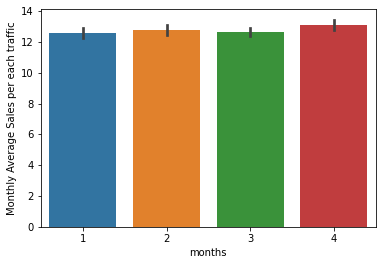

In [46]:
sns.barplot(data = sales_transaction_df, x = 'months', y= 'amount')
plt.ylabel('Monthly Average Sales per each traffic')

In [47]:
month_1 = sales_transaction_df.query('months == 1').amount
month_2 = sales_transaction_df.query('months == 2').amount
month_3 = sales_transaction_df.query('months == 3').amount
month_4 = sales_transaction_df.query('months == 4').amount

In [48]:
# Making a new dataframe by Modifying the dataframe: offers_transaction_df
# The new dataframe will indicates the number of offers that each customer received 
all_offers_infos = pd.concat([offers_transaction_df, pd.get_dummies(offers_transaction_df.offer_type)], axis = 1)
all_issued_offers =all_offers_infos.query('event == "offer received"')

# all_issued_offers per customers
issued_offers_per_customer_df  =all_issued_offers.groupby('customer_id', as_index= False)[['bogo','discount', 'informational']].sum()

# Dataframe (all_issued_offers per customers) is merged with customer profile
customers_offers_merged_profile = issued_offers_per_customer_df.merge(customer_info_df, 
                                                                      left_on = 'customer_id', right_on= 'customer_id', how='left')

In [49]:
customers_offers_merged_profile.head()

,customer_id,bogo,discount,informational,gender,age,became_member_on,income,days_as_member
0,0009655768c64bdeb2e877511632db8f,1,2,2,M,33,2017-04-21,72000.00,466
1,00116118485d4dfda04fdbaba9a87b5c,2,0,0,O,55,2018-04-25,64000.00,97
2,0011e0d4e6b944f998e987f904e8c1e5,1,2,2,O,40,2018-01-09,57000.00,203
3,0020c2b971eb4e9188eac86d93036a77,2,2,1,F,59,2016-03-04,90000.00,879
4,0020ccbbb6d84e358d3414a3ff76cffd,2,1,1,F,24,2016-11-11,60000.00,627


In [50]:
customers_offers_merged_profile.shape

(16994, 9)

In [51]:
customers_offers_merged_profile.describe().T

,count,mean,std,min,25%,50%,75%,max
bogo,16994.00,1.79,1.12,0.00,1.00,2.00,3.00,6.00
discount,16994.00,1.80,1.13,0.00,1.00,2.00,3.00,6.00
informational,16994.00,0.90,0.87,0.00,0.00,1.00,1.00,5.00
age,16994.00,54.47,16.23,18.00,45.00,55.00,65.00,101.00
income,16994.00,65226.90,20174.70,30000.00,51000.00,64000.00,76000.00,120000.00
days_as_member,16994.00,522.44,411.27,5.00,213.00,363.00,796.00,1828.00


In [52]:
#Gender (categorical variable)

In [53]:
gender_order = customers_offers_merged_profile.gender.value_counts()

Text(0.5, 1.0, 'BOGO')

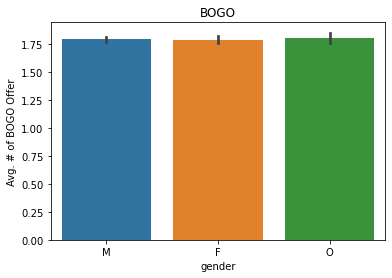

In [54]:
sns.barplot(data = customers_offers_merged_profile, x = 'gender', y= 'bogo', order = gender_order.index)
plt.ylabel('Avg. # of BOGO Offer') 
plt.title('BOGO')

Text(0.5, 1.0, 'Informational')

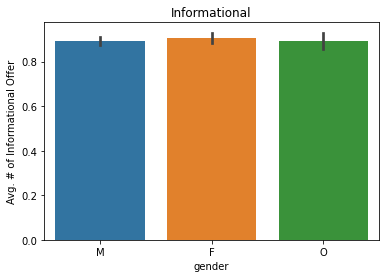

In [55]:
sns.barplot(data = customers_offers_merged_profile, x = 'gender', y= 'informational', order = gender_order.index)
plt.ylabel('Avg. # of Informational Offer') 
plt.title('Informational')

Text(0.5, 1.0, 'Discount')

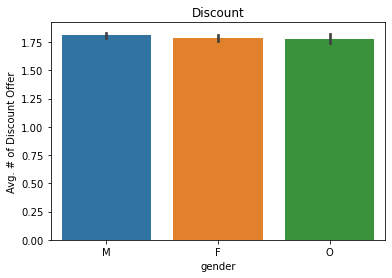

In [56]:
sns.barplot(data = customers_offers_merged_profile, x = 'gender', y= 'discount', order = gender_order.index)
plt.ylabel('Avg. # of Discount Offer') 
plt.title('Discount')

In [57]:
#Income, Age, Days_as_member (numeric variables)

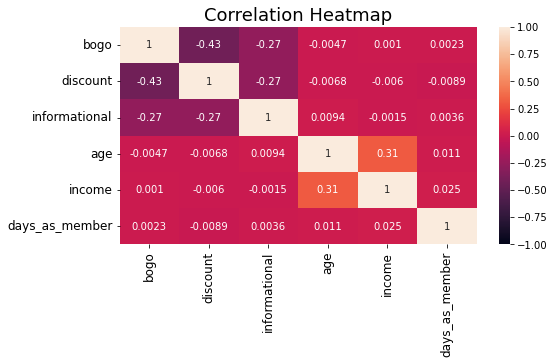

In [58]:
# Correlation in Heatmap form 
plt.figure(figsize=(8,4))
s = sns.heatmap(customers_offers_merged_profile.corr(), annot = True, vmin = -1, vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize =12) 
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize =12) 
plt.title('Correlation Heatmap', fontsize =18)
plt.show()

In [59]:
#Starbucks Offers 

In [60]:
# To avoid double counting
offers_received = offers_transaction_df.query('event=="offer received"')

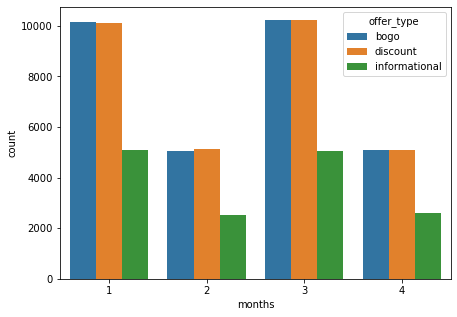

In [61]:
# The number of different offers which are issued in each month
plt.figure(figsize =[7,5])
ax = sns.countplot(data = offers_received, x = 'months', hue = 'offer_type')

In [62]:
offers_received.offer_type.value_counts()

discount         30543
bogo             30499
informational    15235
Name: offer_type, dtype: int64

<AxesSubplot:xlabel='offer_type', ylabel='count'>

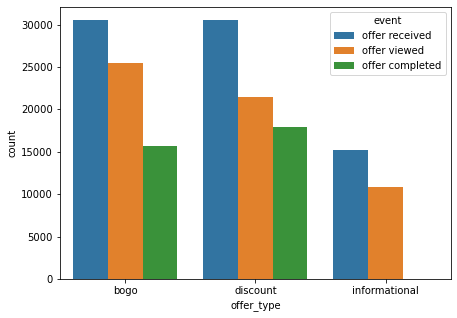

In [63]:
# The number of different events on each offer type. 
plt.figure(figsize =[7,5])
sns.countplot(data = offers_transaction_df, x = 'offer_type', hue = 'event')

In [64]:
#Customer Purchasing Patterns

In [65]:
# How recently did the customer purchase?
recency = sales_transaction_df.groupby('customer_id', as_index= False)['days'].max()
recency['days'] = 120 - recency['days']
recency.rename(columns={'days':'recency'}, inplace = True)  

In [66]:
# How often do they purchase?
transaction_cnt = sales_transaction_df.groupby(['customer_id','days'], as_index= False)['amount'].count()
frequency = transaction_cnt.groupby('customer_id')['days'].count().reset_index()
frequency.rename(columns={'days':'frequency'}, inplace = True)  

In [67]:
# How much do they spend?
monetary = sales_transaction_df.groupby('customer_id', as_index= False)['amount'].sum()
monetary.rename(columns={'amount':'monetary'}, inplace = True)

In [68]:
rfm = recency.merge(frequency, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
rfm_df = rfm.merge(monetary, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')

In [69]:
rfm_df.head()

,customer_id,recency,frequency,monetary
0,0009655768c64bdeb2e877511632db8f,3,8,127.60
1,00116118485d4dfda04fdbaba9a87b5c,40,3,4.09
2,0011e0d4e6b944f998e987f904e8c1e5,10,5,79.46
3,0020c2b971eb4e9188eac86d93036a77,1,8,196.86
4,0020ccbbb6d84e358d3414a3ff76cffd,7,12,154.05


In [70]:
rfm_df.shape

(16578, 4)

In [71]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16578 entries, 0 to 16577
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  16578 non-null  object 
 1   recency      16578 non-null  int32  
 2   frequency    16578 non-null  int64  
 3   monetary     16578 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 582.8+ KB


In [72]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,16578.00,14.24,13.79,0.00,4.00,10.00,20.00,117.00
frequency,16578.00,8.38,5.01,1.00,5.00,7.00,11.00,36.00
monetary,16578.00,107.10,126.39,0.05,23.68,72.41,150.94,1608.69


array([[<AxesSubplot:xlabel='recency', ylabel='recency'>,
        <AxesSubplot:xlabel='frequency', ylabel='recency'>,
        <AxesSubplot:xlabel='monetary', ylabel='recency'>],
       [<AxesSubplot:xlabel='recency', ylabel='frequency'>,
        <AxesSubplot:xlabel='frequency', ylabel='frequency'>,
        <AxesSubplot:xlabel='monetary', ylabel='frequency'>],
       [<AxesSubplot:xlabel='recency', ylabel='monetary'>,
        <AxesSubplot:xlabel='frequency', ylabel='monetary'>,
        <AxesSubplot:xlabel='monetary', ylabel='monetary'>]], dtype=object)

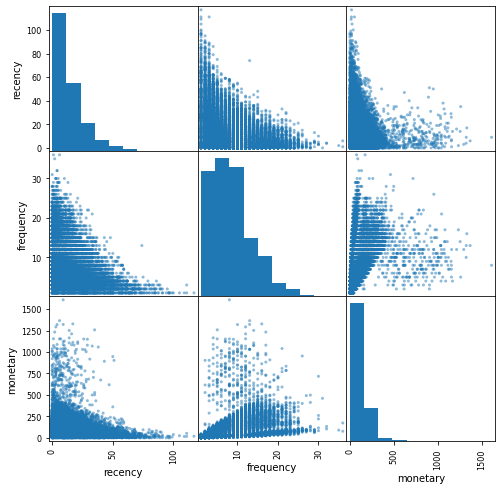

In [73]:
pd.plotting.scatter_matrix(rfm_df, figsize = (8,8))

In [74]:
#Feature Engineering

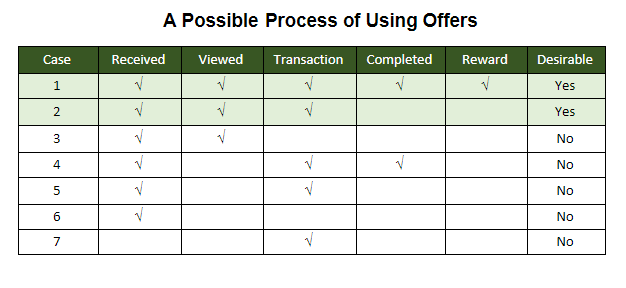

Case 1: If a person received an offer, viewed it, purchased a product, then met the level of difficulty.

Case 2: A person received an offer, viewed it, purchased a product. All these 3 processes occured during the offer duration. However, this person could not reach the difficulty of corresponding offers.

In the provided dataset, some customers show different purchasing patterns.

Case 3: A person received an offer, viewed it during the offer duration. However after the person checked the offer, he/she did not purchase during the offer duration.

Case 4: A person received an offer. However the customer has not viewed it during the offer duration. Then he/she satisfy the difficulty of corresponding offers, so the customer got rewards.

Case 5: Similarly, a person received an offer. However the customer has not viewed it during the offer duration. Since this type of customer has not satisfied the minimum level of spendings, so they could not enjoy any rewards.

Case 6: A customer who received an offer. However, the customer has not checked it and showed any transactions during the offer duration.

Case 7: These customers groups are actually ideal for our company. Although they didnt receive any offers, they purchased products at our stores.

In [75]:
# To figure out which customers belong to which cases, I restructured the transaction dataframe.
transactions_event_df = pd.concat([transactions_df, pd.get_dummies(transactions_df.event)], axis = 1)
transactions_event_df.drop(['event','months'], axis = 1, inplace=True)

In [76]:
# To avoid any confusions, I selected necessary columns for the purpose of analysis in this section and rename the columns.
trans_event_mod_df = transactions_event_df[['customer_id', 'time','offer_id','days','offer received','offer viewed', 'transaction','offer completed','reward']]
trans_event_mod_df.rename(columns={'offer viewed': 'offer_viewed', 'offer received':'offer_received', 'offer completed':'offer_completed' },inplace = True)

C:\Users\hruth\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [77]:
# Then I combined the dataframe with offer type and its duration from offer information dataset. 
trans_offer_info = trans_event_mod_df.merge(offer_info_df[['offer_id', 'offer_type','duration']], 
                                    left_on = 'offer_id', right_on = 'offer_id', how='left')

In [78]:
trans_offer_info.head()

,customer_id,time,offer_id,days,offer_received,offer_viewed,transaction,offer_completed,reward,offer_type,duration
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,0,0,NaN,bogo,7.00
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,0,NaN,discount,10.00
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,1,0,0,0,NaN,discount,7.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,1,0,0,0,NaN,discount,10.00
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,0,0,0,NaN,bogo,5.00


In [79]:
trans_offer_info.isnull().sum()

customer_id             0
time                    0
offer_id                0
days                    0
offer_received          0
offer_viewed            0
transaction             0
offer_completed         0
reward             272955
offer_type         138953
duration           138953
dtype: int64

In [80]:
# For the calculation convenience, I fill up zeros into null values. 
trans_offer_info = trans_offer_info.fillna(0)

In [81]:
# I created a new column represening the last day of each offer. 
trans_offer_info['max_offer_day'] = trans_offer_info.offer_received*(trans_offer_info['duration'] + trans_offer_info['days'])

In [82]:
# Then, I multiply the days column with event columns: 'offer_received', 'offer_viewed', 'transaction', 'offer_completed'
# These event columns now also explain which day does the event occur. 
event_cols = ['offer_received', 'offer_viewed', 'transaction', 'offer_completed']
trans_offer_info[event_cols]= trans_offer_info[event_cols].multiply(trans_offer_info.days, axis="index" )
trans_offer_info.head()

,customer_id,time,offer_id,days,offer_received,offer_viewed,transaction,offer_completed,reward,offer_type,duration,max_offer_day
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,0,0,0.00,bogo,7.00,8.00
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,0,0.00,discount,10.00,11.00
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,1,1,0,0,0,0.00,discount,7.00,8.00
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,1,1,0,0,0,0.00,discount,10.00,11.00
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,0,0,0,0.00,bogo,5.00,6.00


In [83]:
trans_offer_info[event_cols].head()

,offer_received,offer_viewed,transaction,offer_completed
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [84]:
trans_per_pp_days_offer = trans_offer_info.groupby(['customer_id',  'days', 'offer_id'], as_index= False)[['max_offer_day', 'offer_received', 'offer_viewed', 'transaction', 'offer_completed']].max()

In [85]:
# I groupped the transaction dataframe by Customer_id, days, and offer_id.
# The following dataframe (trans_per_pp_days_offer) represents transaction histories per customers, per days, per offers.

In [86]:
trans_offer_info['max_offer_day'].value_counts()

0.00      230257
76.00       5161
104.00      5137
36.00       5135
64.00       5084
92.00       5081
8.00        5015
90.00       2615
11.00       2615
67.00       2565
107.00      2558
74.00       2558
95.00       2541
62.00       2527
34.00       2503
39.00       2495
79.00       2491
6.00        2481
102.00      2480
100.00      1295
101.00      1295
72.00       1293
61.00       1279
73.00       1275
5.00        1273
32.00       1270
33.00       1266
4.00        1266
60.00       1256
88.00       1238
89.00       1229
Name: max_offer_day, dtype: int64

In [87]:
trans_offer_info['offer_id'].value_counts()

                                    138953
fafdcd668e3743c1bb461111dcafc2a4     20241
2298d6c36e964ae4a3e7e9706d1fb8c2     20139
f19421c1d4aa40978ebb69ca19b0e20d     19131
4d5c57ea9a6940dd891ad53e9dbe8da0     18222
ae264e3637204a6fb9bb56bc8210ddfd     18062
9b98b8c7a33c4b65b9aebfe6a799e6d9     16202
2906b810c7d4411798c6938adc9daaa5     15767
5a8bc65990b245e5a138643cd4eb9837     14305
0b1e1539f2cc45b7b9fa7c272da2e1d7     13751
3f207df678b143eea3cee63160fa8bed     11761
Name: offer_id, dtype: int64

In [88]:
# Replace the 0s in 'max_offer_day' column with np. NaNs. 
trans_per_pp_days_offer_v1  = trans_per_pp_days_offer.replace( {'max_offer_day': 0.00, 'offer_id':''}, np.NaN)

In [89]:
trans_per_pp_days_offer_v1.fillna(method='ffill',inplace= True)

In [90]:
trans_per_pp_days_offer_v1.head()

,customer_id,days,offer_id,max_offer_day,offer_received,offer_viewed,transaction,offer_completed
0,0009655768c64bdeb2e877511632db8f,29,5a8bc65990b245e5a138643cd4eb9837,32.00,29,0,0,0
1,0009655768c64bdeb2e877511632db8f,33,5a8bc65990b245e5a138643cd4eb9837,32.00,0,33,0,0
2,0009655768c64bdeb2e877511632db8f,39,5a8bc65990b245e5a138643cd4eb9837,32.00,0,0,39,0
3,0009655768c64bdeb2e877511632db8f,57,3f207df678b143eea3cee63160fa8bed,61.00,57,0,0,0
4,0009655768c64bdeb2e877511632db8f,63,3f207df678b143eea3cee63160fa8bed,61.00,0,63,0,0


In [91]:
trans_per_pp_days_offer_v1.shape

(289408, 8)

In [92]:
#checkpoints
trans_per_event = trans_per_pp_days_offer_v1.copy()

In [93]:
# To receive an offer always occur before max_offer_day 
trans_per_event = trans_per_event.query('offer_received ==0 ')
trans_per_event['event_sum'] = trans_per_event[event_cols].sum(axis=1)

In [94]:
trans_per_event.head()

,customer_id,days,offer_id,max_offer_day,offer_received,offer_viewed,transaction,offer_completed,event_sum
1,0009655768c64bdeb2e877511632db8f,33,5a8bc65990b245e5a138643cd4eb9837,32.00,0,33,0,0,33
2,0009655768c64bdeb2e877511632db8f,39,5a8bc65990b245e5a138643cd4eb9837,32.00,0,0,39,0,39
4,0009655768c64bdeb2e877511632db8f,63,3f207df678b143eea3cee63160fa8bed,61.00,0,63,0,0,63
6,0009655768c64bdeb2e877511632db8f,70,f19421c1d4aa40978ebb69ca19b0e20d,74.00,0,0,70,0,70
7,0009655768c64bdeb2e877511632db8f,70,f19421c1d4aa40978ebb69ca19b0e20d,74.00,0,0,0,70,70


In [95]:
# I created a "desirable" column: meaning that it is a desirable event, when the event occur before the max_offer_day
trans_per_event['desirable'] = trans_per_event['max_offer_day'] - trans_per_event.event_sum

In [96]:
# A desirable event must have positive value. 
desirable_event = trans_per_event.query('desirable >=0 ')

In [97]:
# groupped all transactions by customers, offer_id, and max_offer_days
desirable_event_per_offer = desirable_event.groupby(['customer_id','offer_id','max_offer_day'], as_index = False).max()

In [98]:
# One more condition to be desirable is that a customer should view the offer and purchase the product after received the offer. 
desirable_event_per_offer_mod = desirable_event_per_offer.query('offer_viewed > 0 & transaction > 0')

In [99]:
# Finally, I combined the dataframe with each offer name from offer information dataframe. 
event_name_df = desirable_event_per_offer_mod.merge(offer_info_df[['offer_id', 'offer_type']],left_on = 'offer_id', right_on = 'offer_id', how='left')

In [100]:
event_name_df.head()

,customer_id,offer_id,max_offer_day,days,offer_received,offer_viewed,transaction,offer_completed,event_sum,desirable,offer_type
0,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,95.00,93,0,91,93,89,93,6.00,discount
1,0020c2b971eb4e9188eac86d93036a77,fafdcd668e3743c1bb461111dcafc2a4,11.00,10,0,3,10,10,10,8.00,discount
2,003d66b6608740288d6cc97a6903f4f0,fafdcd668e3743c1bb461111dcafc2a4,79.00,79,0,71,79,0,79,8.00,discount
3,00426fe3ffde4c6b9cb9ad6d077a13ea,fafdcd668e3743c1bb461111dcafc2a4,39.00,37,0,32,37,0,37,7.00,discount
4,004b041fbfe44859945daa2c7f79ee64,f19421c1d4aa40978ebb69ca19b0e20d,90.00,90,0,86,90,90,90,4.00,bogo


In [101]:
event_name_df.customer_id.nunique()

9042

In [102]:
event_name_df.offer_type.value_counts()

discount         6468
bogo             5370
informational    1187
Name: offer_type, dtype: int64

In [103]:
#filtered the data points with 'offer_received' event
offers_received_mod = trans_per_pp_days_offer_v1.query('offer_received > 0')[['customer_id','days','offer_id','max_offer_day']]

In [104]:
total_offers = offers_received_mod.merge(offers_received[['customer_id','days','offer_id','offer_type']],left_on = ['customer_id','days','offer_id'],right_on = ['customer_id','days','offer_id'],how='left')
total_offers.head()

,customer_id,days,offer_id,max_offer_day,offer_type
0,0009655768c64bdeb2e877511632db8f,29,5a8bc65990b245e5a138643cd4eb9837,32.00,informational
1,0009655768c64bdeb2e877511632db8f,57,3f207df678b143eea3cee63160fa8bed,61.00,informational
2,0009655768c64bdeb2e877511632db8f,69,f19421c1d4aa40978ebb69ca19b0e20d,74.00,bogo
3,0009655768c64bdeb2e877511632db8f,85,fafdcd668e3743c1bb461111dcafc2a4,95.00,discount
4,0009655768c64bdeb2e877511632db8f,97,2906b810c7d4411798c6938adc9daaa5,104.00,discount


In [105]:
total_issued_bogo = total_offers.query('offer_type =="bogo"')
total_issued_bogo.tail()

,customer_id,days,offer_id,max_offer_day,offer_type
76266,fff8957ea8b240a6b5e634b6ee8eafcf,97,4d5c57ea9a6940dd891ad53e9dbe8da0,102.00,bogo
76267,fffad4f4828548d1b5583907f2e9906b,1,f19421c1d4aa40978ebb69ca19b0e20d,6.00,bogo
76269,fffad4f4828548d1b5583907f2e9906b,69,f19421c1d4aa40978ebb69ca19b0e20d,74.00,bogo
76270,fffad4f4828548d1b5583907f2e9906b,97,9b98b8c7a33c4b65b9aebfe6a799e6d9,104.00,bogo
76275,ffff82501cea40309d5fdd7edcca4a07,85,9b98b8c7a33c4b65b9aebfe6a799e6d9,92.00,bogo


In [106]:
total_issued_disc = total_offers.query('offer_type =="discount"')
total_issued_disc.head()

,customer_id,days,offer_id,max_offer_day,offer_type
3,0009655768c64bdeb2e877511632db8f,85,fafdcd668e3743c1bb461111dcafc2a4,95.00,discount
4,0009655768c64bdeb2e877511632db8f,97,2906b810c7d4411798c6938adc9daaa5,104.00,discount
8,0011e0d4e6b944f998e987f904e8c1e5,29,2298d6c36e964ae4a3e7e9706d1fb8c2,36.00,discount
10,0011e0d4e6b944f998e987f904e8c1e5,69,0b1e1539f2cc45b7b9fa7c272da2e1d7,79.00,discount
12,0020c2b971eb4e9188eac86d93036a77,1,fafdcd668e3743c1bb461111dcafc2a4,11.00,discount


In [107]:
total_issued_info = total_offers.query('offer_type =="informational"')
total_issued_info.tail()

,customer_id,days,offer_id,max_offer_day,offer_type
76246,fff0f0aac6c547b9b263080f09a5586a,97,3f207df678b143eea3cee63160fa8bed,101.00,informational
76255,fff3ba4757bd42088c044ca26d73817a,57,5a8bc65990b245e5a138643cd4eb9837,60.00,informational
76257,fff3ba4757bd42088c044ca26d73817a,85,5a8bc65990b245e5a138643cd4eb9837,88.00,informational
76265,fff8957ea8b240a6b5e634b6ee8eafcf,85,3f207df678b143eea3cee63160fa8bed,89.00,informational
76268,fffad4f4828548d1b5583907f2e9906b,29,5a8bc65990b245e5a138643cd4eb9837,32.00,informational


In [108]:
total_issued_bogo.shape, total_issued_disc.shape, total_issued_info.shape

((30499, 5), (30543, 5), (15235, 5))

In [109]:
def Classification_of_offers(total_offers, desirable_offer_df): 
    
    desirable_offer_df['desirable_use'] = 'desirable'
    total_offers_final = total_offers.merge(desirable_offer_df[['customer_id','offer_id','max_offer_day','desirable_use']],
                      left_on = ['customer_id','max_offer_day','offer_id'],
                      right_on =['customer_id','max_offer_day','offer_id'],
                      how = 'left')
    total_offers_final= total_offers_final.fillna('non-desirable')
    
    return total_offers_final

In [110]:
Classification_of_offers(total_offers, event_name_df).head()

,customer_id,days,offer_id,max_offer_day,offer_type,desirable_use
0,0009655768c64bdeb2e877511632db8f,29,5a8bc65990b245e5a138643cd4eb9837,32.00,informational,non-desirable
1,0009655768c64bdeb2e877511632db8f,57,3f207df678b143eea3cee63160fa8bed,61.00,informational,non-desirable
2,0009655768c64bdeb2e877511632db8f,69,f19421c1d4aa40978ebb69ca19b0e20d,74.00,bogo,non-desirable
3,0009655768c64bdeb2e877511632db8f,85,fafdcd668e3743c1bb461111dcafc2a4,95.00,discount,desirable
4,0009655768c64bdeb2e877511632db8f,97,2906b810c7d4411798c6938adc9daaa5,104.00,discount,non-desirable


In [111]:
total_issued_bogo = Classification_of_offers(total_offers, event_name_df).query('offer_type =="bogo"')
total_issued_bogo.head()

,customer_id,days,offer_id,max_offer_day,offer_type,desirable_use
2,0009655768c64bdeb2e877511632db8f,69,f19421c1d4aa40978ebb69ca19b0e20d,74.00,bogo,non-desirable
5,00116118485d4dfda04fdbaba9a87b5c,29,f19421c1d4aa40978ebb69ca19b0e20d,34.00,bogo,non-desirable
6,00116118485d4dfda04fdbaba9a87b5c,97,f19421c1d4aa40978ebb69ca19b0e20d,102.00,bogo,non-desirable
11,0011e0d4e6b944f998e987f904e8c1e5,85,9b98b8c7a33c4b65b9aebfe6a799e6d9,92.00,bogo,non-desirable
13,0020c2b971eb4e9188eac86d93036a77,29,ae264e3637204a6fb9bb56bc8210ddfd,36.00,bogo,non-desirable


In [112]:
total_issued_disc = Classification_of_offers(total_offers, event_name_df).query('offer_type =="discount"')
total_issued_disc.head()

,customer_id,days,offer_id,max_offer_day,offer_type,desirable_use
3,0009655768c64bdeb2e877511632db8f,85,fafdcd668e3743c1bb461111dcafc2a4,95.00,discount,desirable
4,0009655768c64bdeb2e877511632db8f,97,2906b810c7d4411798c6938adc9daaa5,104.00,discount,non-desirable
8,0011e0d4e6b944f998e987f904e8c1e5,29,2298d6c36e964ae4a3e7e9706d1fb8c2,36.00,discount,non-desirable
10,0011e0d4e6b944f998e987f904e8c1e5,69,0b1e1539f2cc45b7b9fa7c272da2e1d7,79.00,discount,non-desirable
12,0020c2b971eb4e9188eac86d93036a77,1,fafdcd668e3743c1bb461111dcafc2a4,11.00,discount,desirable


In [113]:
total_issued_info = Classification_of_offers(total_offers, event_name_df).query('offer_type =="informational"')
total_issued_info.head()

,customer_id,days,offer_id,max_offer_day,offer_type,desirable_use
0,0009655768c64bdeb2e877511632db8f,29,5a8bc65990b245e5a138643cd4eb9837,32.00,informational,non-desirable
1,0009655768c64bdeb2e877511632db8f,57,3f207df678b143eea3cee63160fa8bed,61.00,informational,non-desirable
7,0011e0d4e6b944f998e987f904e8c1e5,1,3f207df678b143eea3cee63160fa8bed,5.00,informational,non-desirable
9,0011e0d4e6b944f998e987f904e8c1e5,57,5a8bc65990b245e5a138643cd4eb9837,60.00,informational,non-desirable
16,0020c2b971eb4e9188eac86d93036a77,85,5a8bc65990b245e5a138643cd4eb9837,88.00,informational,non-desirable


In [114]:
print('BOGO Offer:' )
print(total_issued_bogo.desirable_use.value_counts())

BOGO Offer:
non-desirable    25129
desirable         5370
Name: desirable_use, dtype: int64


In [115]:
print('Discount Offer:' )
print(total_issued_disc.desirable_use.value_counts())

Discount Offer:
non-desirable    24075
desirable         6468
Name: desirable_use, dtype: int64


In [116]:
print('Informational Offer:' )
print(total_issued_info.desirable_use.value_counts())

Informational Offer:
non-desirable    14048
desirable         1187
Name: desirable_use, dtype: int64


In [117]:
#converting data into csv file to work on tableau 

In [118]:
Classification_of_offers(total_offers, event_name_df).to_csv('total_issued_offer.csv', index=False)

In [119]:
rfm_df.to_csv('rfm_score.csv', index=False)

In [120]:
customer_info_df.to_csv('customer_df.csv', index=False)

In [121]:
#checkpoints
offer_df= Classification_of_offers(total_offers, event_name_df)
customer_df= customer_info_df
rfm_df = rfm_df

In [122]:
# Merge all the datasets
customer_offer_df_mod = offer_df.merge(customer_df, left_on = 'customer_id', right_on ='customer_id', how='left')
customer_offer_df =customer_offer_df_mod.merge(rfm_df, left_on = 'customer_id', right_on ='customer_id', how='left').fillna(0)

In [123]:
#converting data into csv file to work on tableau 
#customer_offer_df.to_csv('customer_offer_df',index=False)

In [124]:
customer_offer_df.head()

,customer_id,days,offer_id,max_offer_day,offer_type,desirable_use,gender,age,became_member_on,income,days_as_member,recency,frequency,monetary
0,0009655768c64bdeb2e877511632db8f,29,5a8bc65990b245e5a138643cd4eb9837,32.00,informational,non-desirable,M,33,2017-04-21,72000.00,466,3.00,8.00,127.60
1,0009655768c64bdeb2e877511632db8f,57,3f207df678b143eea3cee63160fa8bed,61.00,informational,non-desirable,M,33,2017-04-21,72000.00,466,3.00,8.00,127.60
2,0009655768c64bdeb2e877511632db8f,69,f19421c1d4aa40978ebb69ca19b0e20d,74.00,bogo,non-desirable,M,33,2017-04-21,72000.00,466,3.00,8.00,127.60
3,0009655768c64bdeb2e877511632db8f,85,fafdcd668e3743c1bb461111dcafc2a4,95.00,discount,desirable,M,33,2017-04-21,72000.00,466,3.00,8.00,127.60
4,0009655768c64bdeb2e877511632db8f,97,2906b810c7d4411798c6938adc9daaa5,104.00,discount,non-desirable,M,33,2017-04-21,72000.00,466,3.00,8.00,127.60


In [125]:
customer_offer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76277 entries, 0 to 76276
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       76277 non-null  object        
 1   days              76277 non-null  int64         
 2   offer_id          76277 non-null  object        
 3   max_offer_day     76277 non-null  float64       
 4   offer_type        76277 non-null  object        
 5   desirable_use     76277 non-null  object        
 6   gender            76277 non-null  object        
 7   age               76277 non-null  int64         
 8   became_member_on  76277 non-null  datetime64[ns]
 9   income            76277 non-null  float64       
 10  days_as_member    76277 non-null  int64         
 11  recency           76277 non-null  float64       
 12  frequency         76277 non-null  float64       
 13  monetary          76277 non-null  float64       
dtypes: datetime64[ns](1), 

In [126]:
customer_offer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
days,76277.00,56.43,32.75,1.00,29.00,69.00,85.00,97.00
max_offer_day,76277.00,62.93,32.82,4.00,36.00,72.00,92.00,107.00
age,76277.00,54.45,16.24,18.00,45.00,55.00,65.00,101.00
income,76277.00,65195.83,20195.31,30000.00,51000.00,64000.00,76000.00,120000.00
days_as_member,76277.00,522.04,411.58,5.00,213.00,363.00,797.00,1828.00
recency,76277.00,13.69,13.70,0.00,4.00,10.00,19.00,117.00
frequency,76277.00,8.37,5.23,0.00,4.00,7.00,11.00,36.00
monetary,76277.00,106.94,128.51,0.00,22.28,70.88,152.27,1608.69


In [127]:
# Drop the unnecessary features 
customer_offer_df.drop(['became_member_on','days','max_offer_day','offer_id'],axis =1, inplace= True)

In [128]:
total_issued_bogo = customer_offer_df.query('offer_type =="bogo"')
total_issued_disc = customer_offer_df.query('offer_type =="discount"')
total_issued_info = customer_offer_df.query('offer_type =="informational"')

In [129]:
#Imbalanced Data
print('BOGO Offer:' )
print(total_issued_bogo.desirable_use.value_counts())
print(' ')
print('Discount Offer:' )
print(total_issued_disc.desirable_use.value_counts())
print(' ')
print('Informational Offer:' )
print(total_issued_info.desirable_use.value_counts())

BOGO Offer:
non-desirable    25129
desirable         5370
Name: desirable_use, dtype: int64
 
Discount Offer:
non-desirable    24075
desirable         6468
Name: desirable_use, dtype: int64
 
Informational Offer:
non-desirable    14048
desirable         1187
Name: desirable_use, dtype: int64


<AxesSubplot:xlabel='offer_type', ylabel='count'>

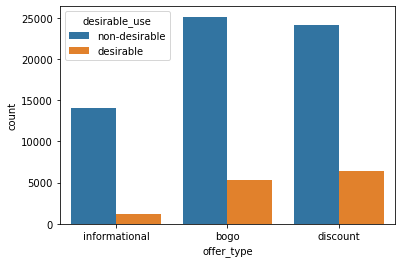

In [130]:
sns.countplot(data= customer_offer_df, x= 'offer_type', hue = 'desirable_use')

In [131]:
def Feature_selection(offer_df):
    
    # Target variable: 'desirable_use'
    categorical_target = offer_df.desirable_use
    
    selected_inputs = []
    
    # Numerical Inputs Selection 
    numerical_inputs = offer_df.drop(['customer_id','desirable_use','gender','offer_type'], axis =1)
    
    anova_test = f_classif(numerical_inputs, categorical_target)
    
    prob = 0.95
    alpha = 1.0 - prob
    
    for i in range(len(anova_test[1])):
        if anova_test[1][i] < alpha:
            selected_inputs.append(numerical_inputs.columns[i])
    
    # Categorical Inputs Selection 
    categorical_input = offer_df['gender']
    gender_df = pd.get_dummies(offer_df.gender, prefix = 'gender', prefix_sep = '_')
    gender_df['desirable_use'], gender_df['customer_id'] = offer_df['desirable_use'], offer_df['customer_id']
    
    contingency_table = gender_df.groupby(['desirable_use'], as_index = True).sum()
    stat, p, dof, expected = chi2_contingency(contingency_table.values)
       
    if p <= alpha:
        selected_inputs.append('gender')

        
    return offer_df[selected_inputs]


In [132]:
total_issued_bogo.columns

Index(['customer_id', 'offer_type', 'desirable_use', 'gender', 'age', 'income',
       'days_as_member', 'recency', 'frequency', 'monetary'],
      dtype='object')

In [133]:
total_issued_disc.columns

Index(['customer_id', 'offer_type', 'desirable_use', 'gender', 'age', 'income',
       'days_as_member', 'recency', 'frequency', 'monetary'],
      dtype='object')

In [134]:
total_issued_info.columns

Index(['customer_id', 'offer_type', 'desirable_use', 'gender', 'age', 'income',
       'days_as_member', 'recency', 'frequency', 'monetary'],
      dtype='object')

In [135]:
bogo_df = Feature_selection(total_issued_bogo)
discount_df = Feature_selection(total_issued_disc)
informational_df = Feature_selection(total_issued_info)

In [136]:
bogo_target= total_issued_bogo.desirable_use
disc_target= total_issued_disc.desirable_use
info_target= total_issued_info.desirable_use

In [137]:
# Bogo
bogo_trainX, bogo_testX, bogo_trainy, bogo_testy = train_test_split(bogo_df, bogo_target, 
                                                                  test_size=0.2, random_state=100)
# Discount
disc_trainX, disc_testX, disc_trainy, disc_testy = train_test_split(discount_df, disc_target, 
                                                                    test_size=0.2, random_state=100)
# Informational
info_trainX, info_testX, info_trainy, info_testy = train_test_split(informational_df, info_target, 
                                                                    test_size=0.2, random_state=100)

In [141]:
def Balancing_Data(X_train, y_train): 
    
    # Decide how many the minority class should be oversampled 
    
    nondes_train = int(collections.Counter(y_train)['non-desirable'])
    # des_train = int(collections.Counter(y_train)['desirable']*4)
    des_train = int(nondes_train*0.7)
    
    # Transform the dataset
    strategy = { 'non-desirable':nondes_train, 'desirable':des_train}
    oversample = SMOTE(sampling_strategy=strategy)
    
    # Balanced dataset 
    X_balanced, y_balanced = oversample.fit_resample( X_train, y_train)
    
    # Summarize newly balanced Distribution
    counter = Counter(y_balanced)
    for k,v in counter.items():
        per = v / len(y_balanced) * 100
        print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
        
    # Plot the distribution
    plt.bar(counter.keys(), counter.values())
    plt.show()
    
    balanced_train = pd.concat([X_balanced, y_balanced],axis=1)
    
    return balanced_train
    

Class=non-desirable, n=20106 (58.824%)
Class=desirable, n=14074 (41.176%)


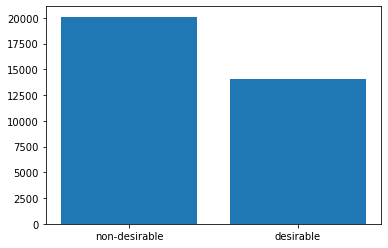

Class=non-desirable, n=19259 (58.824%)
Class=desirable, n=13481 (41.176%)


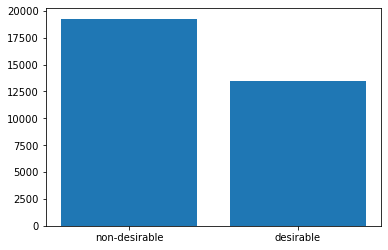

Class=non-desirable, n=11217 (58.826%)
Class=desirable, n=7851 (41.174%)


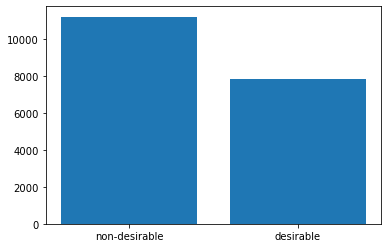

In [142]:
balanced_bogo = Balancing_Data(bogo_trainX, bogo_trainy)
balanced_disc = Balancing_Data(disc_trainX, disc_trainy)
balanced_info = Balancing_Data(info_trainX, info_trainy)

In [143]:
# Model Comparison

Sklearn Ensemble Methods (Random Forest, AdaBoost, GradientBoost)

XGBoost vs. LightGBM vs. CatBoost

LogisticRegression

In [147]:
# 1. Sklearn Ensemble Methods
rf = RandomForestClassifier(n_estimators=500, max_features=0.06, n_jobs=6, class_weight = 'balanced',verbose = 0, random_state=42)

In [149]:
base_estim = DecisionTreeClassifier(max_depth=1, max_features=0.06)

In [150]:
ab = AdaBoostClassifier(base_estimator=base_estim, n_estimators=500, learning_rate=0.5, random_state=42)

In [151]:
gbm = GradientBoostingClassifier(n_estimators=2000, subsample=0.75, max_features=0.06, verbose = 0,  validation_fraction=0.1, random_state=42)

In [172]:
# 2. XG Boost vs. Light GBM vs. CatBoost
#xgb = xgb.XGBClassifier(n_estimators=2000, tree_method='hist', subsample=0.75,objective = 'binary:logistic', n_jobs=6, random_state=42)

In [154]:
lgbm = lgb.LGBMClassifier(n_estimators=2000, n_jobs=6, random_state=42)

In [158]:
cb =  cb.CatBoostClassifier(n_estimators=2000, colsample_bylevel=0.06, max_leaves=31, subsample=0.75,thread_count=6, verbose = 0, random_state=42)

In [160]:
# 3. LogisticRegression Model
logreg = LogisticRegression(random_state=42, class_weight = 'balanced')

In [173]:
models = [logreg, rf, ab, gbm, lgbm, cb]
model_names = [i.__class__.__name__ for i in models]
es_models = ['XGBClassifier', 'LGBMClassifier', 'CatBoostClassifier']

In [174]:
def Train_Evaluate_Models(balanced_df, test_inputs, test_target):
    
    # Identify target and inputs variables
    balanced_target= balanced_df.desirable_use
    balanced_inputs= balanced_df.drop(['desirable_use'], axis=1)
    
    # Create a validation sample from balanced training data 
    trainX_sub, trainX_valid, trainy_sub, trainy_valid = train_test_split(balanced_inputs, balanced_target, test_size=0.1)
    
    # Set up a dataframe to contain the results
    results = pd.DataFrame(columns=['accuracy','prediction','recall','f1_score', 'run_time'])  
    
    # Training the models 
    for m, n in zip(models, model_names):
    
        start_time = time()
        if n in es_models:
            m.fit(trainX_sub, trainy_sub,
                  eval_set = [(trainX_valid, trainy_valid)], 
                  early_stopping_rounds=15, verbose=0)
        else:
            m.fit(balanced_inputs, balanced_target)
    
        run_time = time() - start_time

        y_pred = m.predict(test_inputs)
        accuracy = np.mean( y_pred == test_target)
        precision = precision_score(test_target, y_pred, average= 'weighted', zero_division=0)
        recall = recall_score(test_target, y_pred, average= 'weighted', zero_division=0)
        f1_score = 2 * (precision * recall) / (precision + recall)

        results.loc[n] = [accuracy,precision, recall, f1_score, run_time]

        del m
    
    return results

In [175]:
Train_Evaluate_Models(balanced_bogo, bogo_testX, bogo_testy)

C:\Users\hruth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hruth\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\hruth\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and wi

,accuracy,prediction,recall,f1_score,run_time
LogisticRegression,0.63,0.78,0.63,0.70,0.34
RandomForestClassifier,0.72,0.73,0.72,0.73,6.67
AdaBoostClassifier,0.72,0.76,0.72,0.74,19.26
GradientBoostingClassifier,0.81,0.74,0.81,0.77,27.56
LGBMClassifier,0.81,0.74,0.81,0.77,0.61
CatBoostClassifier,0.73,0.76,0.73,0.75,1.71


In [176]:
Train_Evaluate_Models(balanced_disc, disc_testX, disc_testy)

C:\Users\hruth\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\hruth\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


,accuracy,prediction,recall,f1_score,run_time
LogisticRegression,0.62,0.73,0.62,0.67,0.31
RandomForestClassifier,0.68,0.69,0.68,0.69,6.44
AdaBoostClassifier,0.70,0.72,0.70,0.71,17.53
GradientBoostingClassifier,0.76,0.70,0.76,0.73,26.20
LGBMClassifier,0.77,0.70,0.77,0.73,0.43
CatBoostClassifier,0.69,0.72,0.69,0.71,3.79


In [177]:
Train_Evaluate_Models(balanced_info, info_testX, info_testy)

C:\Users\hruth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hruth\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\hruth\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and wi

,accuracy,prediction,recall,f1_score,run_time
LogisticRegression,0.64,0.90,0.64,0.75,0.18
RandomForestClassifier,0.87,0.88,0.87,0.88,3.71
AdaBoostClassifier,0.78,0.89,0.78,0.83,10.45
GradientBoostingClassifier,0.92,0.87,0.92,0.89,14.77
LGBMClassifier,0.92,0.87,0.92,0.89,0.58
CatBoostClassifier,0.77,0.89,0.77,0.82,4.23


In [ ]:
#Model Selection

LGBMClassifier

For all type of offers, "LGBMClassifier" shows one of the outstanding model performances. Also the model performed well within a short period of time.

In [183]:
bogo_all_results = pd.DataFrame(lgbm.predict(bogo_testX), columns=['predicted_target'])
bogo_predicted = pd.concat([bogo_testX.reset_index(), bogo_all_results], axis=1)
bogo_predicted.head()

,index,age,income,days_as_member,recency,frequency,monetary,predicted_target
0,1238,18,62000.00,1005,1.00,8.00,139.04,non-desirable
1,41048,65,48000.00,364,7.00,6.00,11.53,non-desirable
2,18928,54,107000.00,302,19.00,7.00,201.40,non-desirable
3,28167,55,64000.00,913,27.00,13.00,25.14,non-desirable
4,47825,25,52000.00,871,9.00,13.00,175.92,non-desirable


In [186]:
bogo_predicted['predicted_target'].value_counts()

non-desirable    6000
desirable         100
Name: predicted_target, dtype: int64

Text(0.5, 1.0, 'Recency (BOGO)')

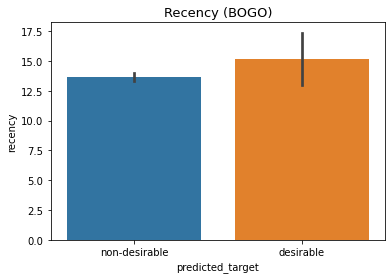

In [189]:
sns.barplot(data = bogo_predicted, x = 'predicted_target', y = 'recency')
plt.title('Recency (BOGO)', fontsize = 13)

Text(0.5, 1.0, 'Frequency (BOGO)')

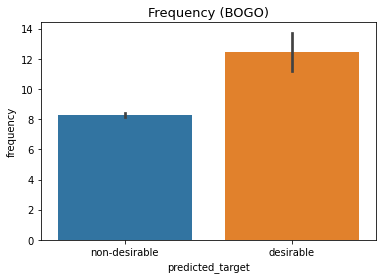

In [190]:
sns.barplot(data = bogo_predicted, x = 'predicted_target', y = 'frequency')
plt.title('Frequency (BOGO)', fontsize = 13)

Text(0.5, 1.0, 'Monetary Value (BOGO)')

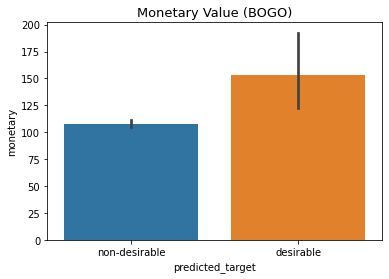

In [191]:
sns.barplot(data = bogo_predicted, x = 'predicted_target', y = 'monetary')
plt.title('Monetary Value (BOGO)', fontsize = 13)

In [184]:
disc_all_results = pd.DataFrame(lgbm.predict(disc_testX), columns=['predicted_target'])
disc_predicted = pd.concat([disc_testX.reset_index(), disc_all_results], axis=1)
disc_predicted.head()

,index,age,income,days_as_member,recency,frequency,monetary,predicted_target
0,26988,43,68000.00,235,10.00,8.00,124.10,non-desirable
1,41673,49,48000.00,365,4.00,3.00,6.36,non-desirable
2,7162,71,97000.00,835,5.00,12.00,362.78,non-desirable
3,10695,35,54000.00,1045,3.00,8.00,126.13,non-desirable
4,13116,49,42000.00,762,7.00,14.00,129.82,non-desirable


In [187]:
disc_predicted['predicted_target'].value_counts()

non-desirable    6009
desirable         100
Name: predicted_target, dtype: int64

Text(0.5, 1.0, 'Recency (Discount)')

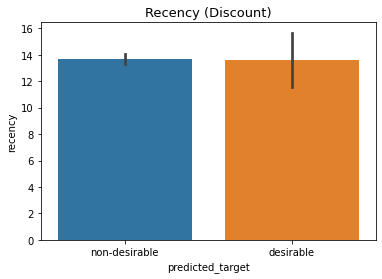

In [192]:
sns.barplot(data = disc_predicted, x = 'predicted_target', y = 'recency')
plt.title('Recency (Discount)', fontsize = 13)

Text(0.5, 1.0, 'Frequency (Discount)')

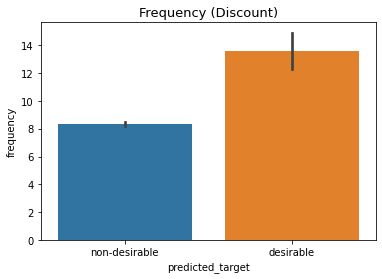

In [193]:
sns.barplot(data = disc_predicted, x = 'predicted_target', y = 'frequency')
plt.title('Frequency (Discount)', fontsize = 13)

Text(0.5, 1.0, 'Monetary (Discount)')

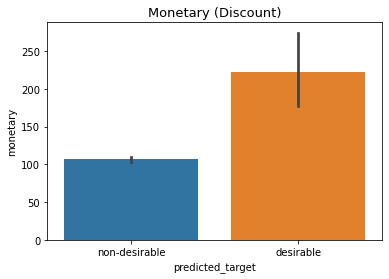

In [194]:
sns.barplot(data = disc_predicted, x = 'predicted_target', y = 'monetary')
plt.title('Monetary (Discount)', fontsize = 13)

In [185]:
info_all_results = pd.DataFrame(lgbm.predict(info_testX), columns=['predicted_target'])
info_predicted = pd.concat([info_testX.reset_index(), info_all_results], axis=1)
info_predicted.head()

,index,age,income,days_as_member,recency,frequency,monetary,predicted_target
0,4965,71,52000.00,160,13.00,5.00,64.96,non-desirable
1,48245,51,74000.00,772,24.00,11.00,203.10,non-desirable
2,53034,63,59000.00,562,5.00,18.00,91.78,non-desirable
3,10891,40,53000.00,154,22.00,5.00,8.17,non-desirable
4,74547,55,64000.00,304,15.00,7.00,17.46,non-desirable


In [188]:
info_predicted['predicted_target'].value_counts()

non-desirable    3004
desirable          43
Name: predicted_target, dtype: int64

Text(0.5, 1.0, 'Recency (Informational)')

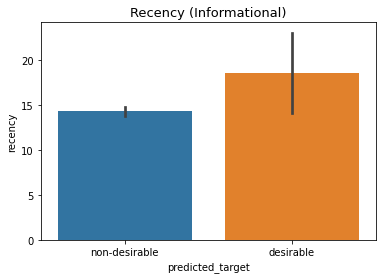

In [195]:
sns.barplot(data = info_predicted, x = 'predicted_target', y = 'recency')
plt.title('Recency (Informational)', fontsize = 13)

Text(0.5, 1.0, 'Frequency (Informational)')

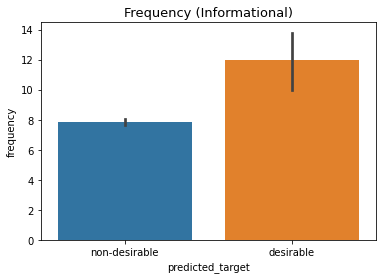

In [196]:
sns.barplot(data = info_predicted, x = 'predicted_target', y = 'frequency')
plt.title('Frequency (Informational)', fontsize = 13)

Text(0.5, 1.0, 'Monetary (Informational)')

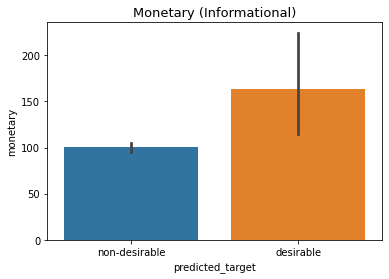

In [197]:
sns.barplot(data = info_predicted, x = 'predicted_target', y = 'monetary')
plt.title('Monetary (Informational)', fontsize = 13)